In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:07        5
                      ..
14-07-2016 06:51:18    1
15-07-2016 10:36:47    1
15-07-2016 23:02:31    1
13-07-2016 07:16:45    1
13-07-2016 08:43:36    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [11]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [12]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [14]:
df["Request timestamp"].value_counts()

2016-07-11 17:57:00    6
2016-07-11 19:02:00    6
2016-07-11 09:40:00    6
2016-07-11 08:37:00    6
2016-07-11 09:24:00    5
                      ..
2016-07-12 16:53:00    1
2016-07-15 05:58:18    1
2016-07-12 07:07:00    1
2016-07-13 17:19:44    1
2016-07-14 08:38:38    1
Name: Request timestamp, Length: 5618, dtype: int64

In [15]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [17]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
req_hour=df["Request timestamp"].dt.hour

In [19]:
len(req_hour)

6745

In [20]:
df["req_hour"]=req_hour

In [21]:
req_day=df["Request timestamp"].dt.day

In [22]:
df["req_day"]=req_day

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

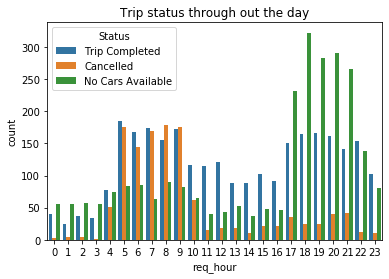

In [26]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.title("Trip status through out the day")
plt.show()

<b> `Observations:`</b>
     - Overall unavailablity of cars is higher from 5:00 PM to 11:00 PM.
     - Overall cancellation is higher during 5:00 AM to 10:00 AM.
     

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


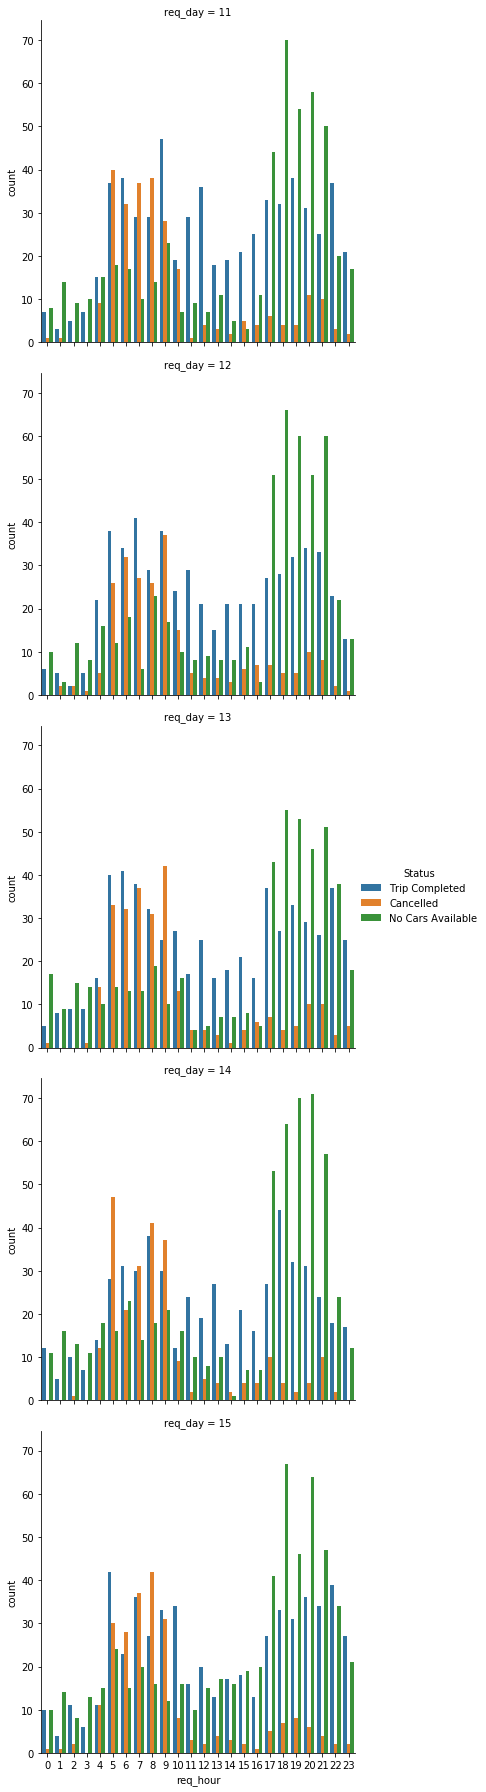

In [27]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


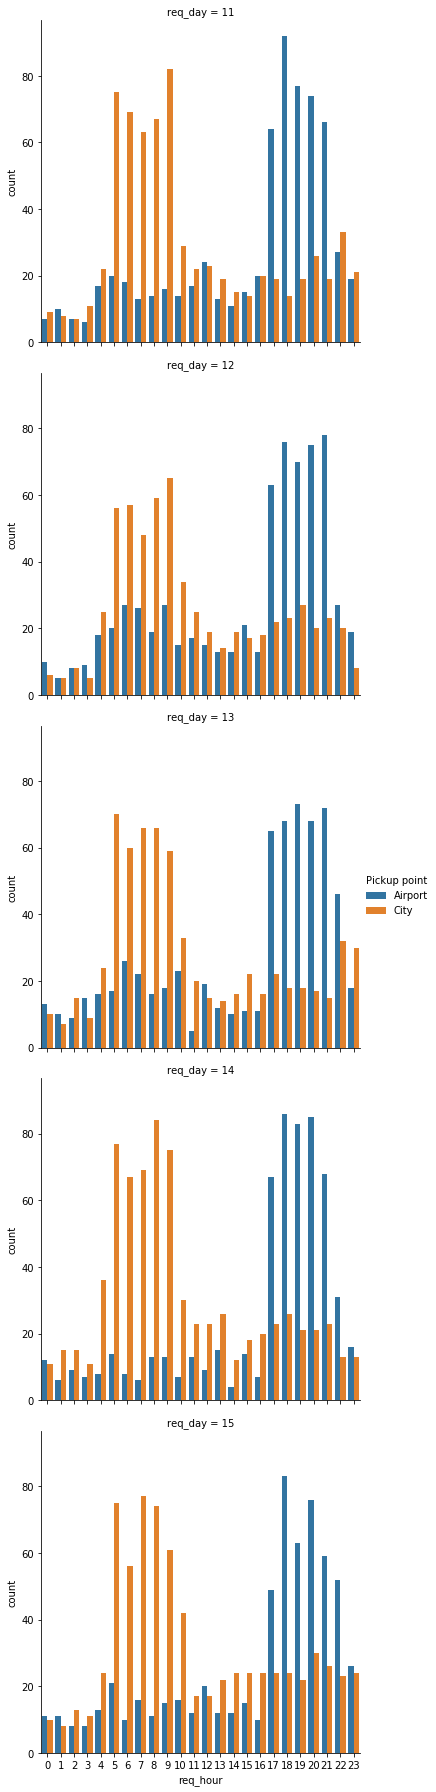

In [28]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

<b> `Observation:` </b>
* Hourly trip status characteristics remains independent of the date.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


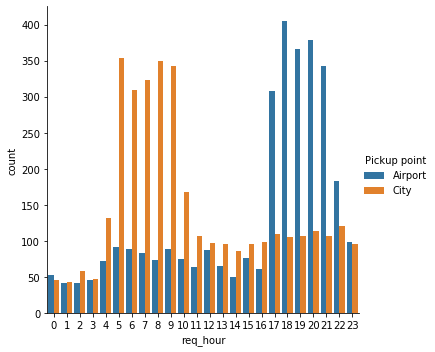

In [29]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

<b> `Observations:` </b>
* During morning hours (4:00 AM to 11:00 AM) most of the requests were made at the City.
* During evening hours (5:00 PM to 11:00 PM) most of the requests were made at the Airport.

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [31]:
df["Time_Slot"]=0

In [32]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [33]:
df["req_hour"]

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [34]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [35]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [36]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

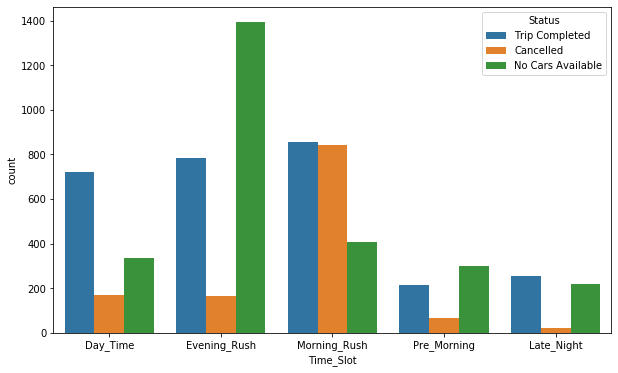

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

<b> `Observations:` </b>
    - Overall(combining all pickup points) unavailability of cars is highest during the evening rush hour.
    - Overall most cancellations occurs during the morning rush hour. 

In [38]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']


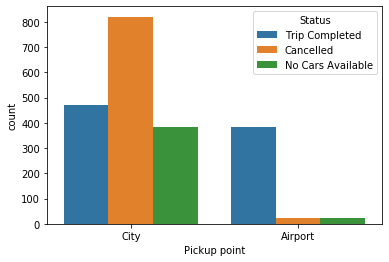

In [39]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

<b> ` Observations:` </b>
*  Overall (considering whole day) unavilability and cancellation problem is much higher from City to Airport. 

In [40]:
df["Days of Week"]= df["Request timestamp"].dt.day_name()

In [41]:
df["Days of Week"]

0          Monday
1          Monday
2         Tuesday
3         Tuesday
4       Wednesday
          ...    
6740       Friday
6741       Friday
6742       Friday
6743       Friday
6744       Friday
Name: Days of Week, Length: 6745, dtype: object

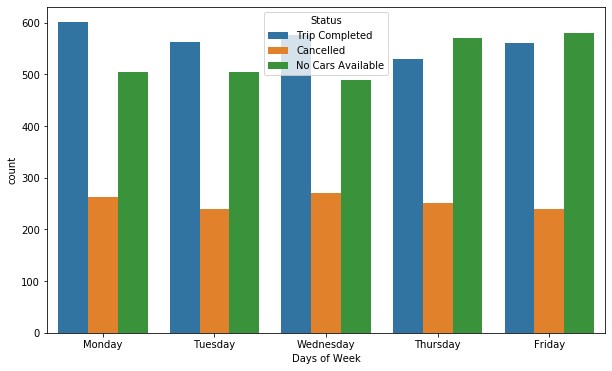

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x="Days of Week",hue="Status",data=df)
plt.show()

* <b> `Observation`:</b> Unavailability of Cars is higher on Thursday and Friday. More cars needed for those days.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


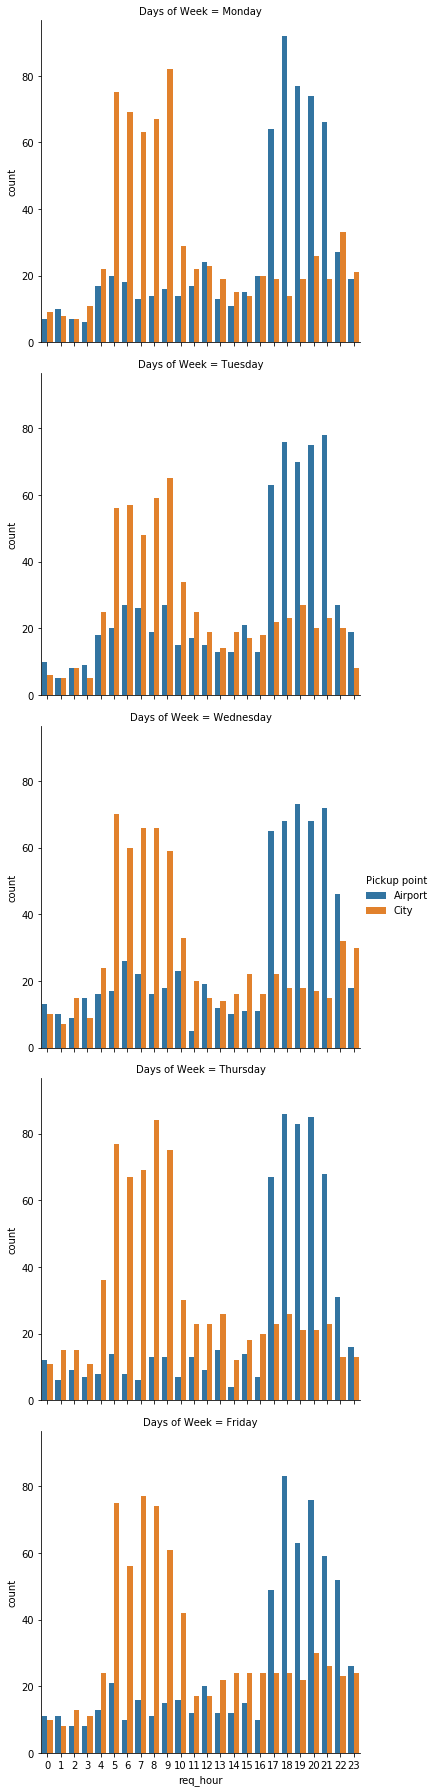

In [43]:
sns.factorplot(x="req_hour",data=df,row="Days of Week",hue="Pickup point",kind="count")
plt.show()

In [44]:
df_trip_completed = df[df["Status"]=="Trip Completed"]
df_trip_completed

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot,Days of Week
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,Wednesday
...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00,22,11,Late_Night,Monday
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,6,13,Morning_Rush,Wednesday
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,12,13,Day_Time,Wednesday
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,22,13,Late_Night,Wednesday


In [45]:
df_trip_completed["Trip Duration"] = df_trip_completed["Drop timestamp"] - df_trip_completed["Request timestamp"]
df_trip_completed

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot,Days of Week,Trip Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time,Monday,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush,Monday,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush,Tuesday,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush,Tuesday,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,Wednesday,0 days 00:52:31
...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00,22,11,Late_Night,Monday,0 days 00:41:00
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,6,13,Morning_Rush,Wednesday,0 days 00:49:30
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,12,13,Day_Time,Wednesday,0 days 00:42:42
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,22,13,Late_Night,Wednesday,0 days 01:17:05


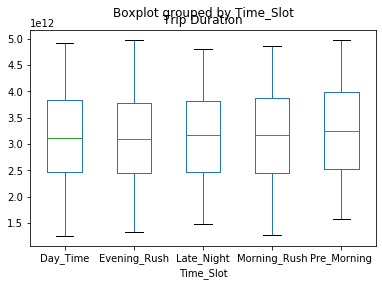

In [46]:
df_trip_completed.boxplot(by="Time_Slot", column = ["Trip Duration"], grid = False)

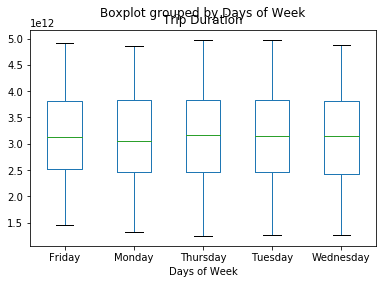

In [47]:
df_trip_completed.boxplot(by="Days of Week", column=["Trip Duration"], grid = False)

<b> `Observation:` </b> 
    * Boxplots for the duration of trips seems not much conclusive. The median trip time for the Pre-morning hours is very little higher than other time-slots.
    * Trip durations are almost same for all the days of the week.

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [48]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [49]:
df_airport_cancelled.shape[0]

23

In [50]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [51]:
df_city_cancelled.shape[0]

820

<b> `Observation:` </b>
 * In the morning rush time-slot 820 trip cancellations happened from City, while only 23 trip cancellations happened from the Airport.

In [52]:
df_city_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,13,Morning_Rush
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,8,14,Morning_Rush
2842,4383,City,3.0,Cancelled,2016-07-14 07:48:31,NaT,7,14,Morning_Rush
2846,4280,City,4.0,Cancelled,2016-07-14 06:33:09,NaT,6,14,Morning_Rush
2847,4533,City,4.0,Cancelled,2016-07-14 09:31:08,NaT,9,14,Morning_Rush
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,7,12,Morning_Rush
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,5,14,Morning_Rush
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,5,14,Morning_Rush
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,8,14,Morning_Rush


In [53]:
df_cancelled_morning = df_morning_rush.loc[df_morning_rush["Status"]=="Cancelled"]

In [54]:
df_cancelled_morning

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,13,Morning_Rush
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,8,14,Morning_Rush
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2842,4383,City,3.0,Cancelled,2016-07-14 07:48:31,NaT,7,14,Morning_Rush
2846,4280,City,4.0,Cancelled,2016-07-14 06:33:09,NaT,6,14,Morning_Rush
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,7,12,Morning_Rush
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,5,14,Morning_Rush
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,5,14,Morning_Rush
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,8,14,Morning_Rush


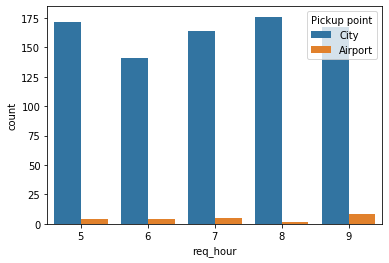

In [55]:
sns.countplot(x="req_hour",hue="Pickup point",data=df_cancelled_morning)
plt.show()

<b> `Observation:` </b>
* During morning rush hours number of cancellations from the City is much higher than the number of cancellation from Airport.  


In [56]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']
df_cancelled_evening = df_evening_rush.loc[df_evening_rush["Status"]=="Cancelled"]

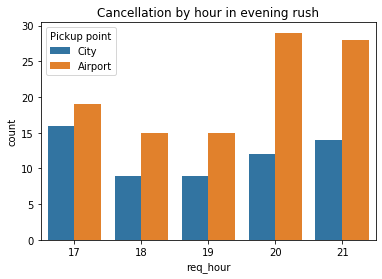

In [57]:
sns.countplot(x="req_hour",hue="Pickup point",data=df_cancelled_evening)
plt.title("Cancellation by hour in evening rush")
plt.show()

<b> `Observations:` </b>
* During evening rush hours number of cancellations from the Airport is higher than the number of cancellation from City.  
* Most cancellations from the Airport happened during 8:00 PM and 9:00 PM. 

# Supply and demand

In [58]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


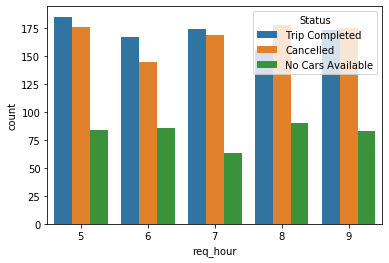

In [59]:
sns.countplot(x="req_hour",hue="Status",data=df_morning_rush)
plt.show()

<b> `Observation:` </b>
* In the morning rush hours number of cancellation is higher than the trip completed during 8:00 AM and 9:00 AM.

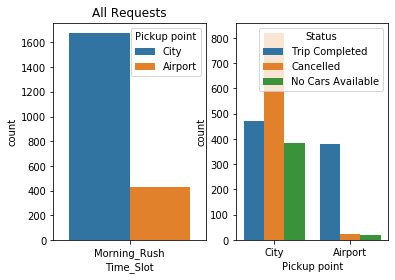

In [60]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="Time_Slot", hue="Pickup point", data=df_morning_rush, ax=ax[0]).set_title("All Requests")
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush, ax=ax[1])
plt.show()

* The figure on the left shows the all the requests made during morning rush hours from Airport and City. We can think that figure on the left as a visualization of total demands. The figure on the right shows how much of the demands are met.

<b> `Observations:` 
* During the morning rush time-slot number of requests made from the City is much higher than the requests made from the Airport.
* Cancellations and unavailability of cars is also much higher in the City during the morning rush time slot.
* More cars need to be alloted to the City during morning rush time-slot.

In [61]:
df_late_night = df[df["Time_Slot"]=="Late_Night"]

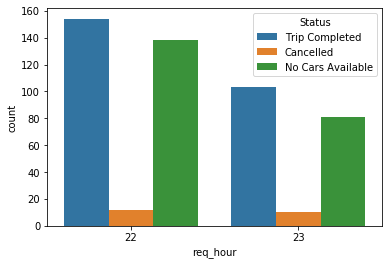

In [62]:
sns.countplot(x="req_hour",hue="Status",data=df_late_night)
plt.show()

<b> `Observations:` </b>
* Cancellation problem is less severe in the late night time-slot.
* Unavailability of Cars is a big issue during this time-slot.

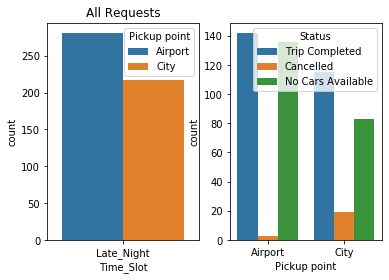

In [63]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="Time_Slot", hue="Pickup point", data=df_late_night, ax=ax[0]).set_title("All Requests")
sns.countplot(x="Pickup point",hue="Status",data=df_late_night, ax=ax[1])
plt.show()

* The figure on the left shows the all the requests made during late night hours from Airport and City. We can think that figure on the left as a visualization of total demands. The figure on the right shows how much of the demands are met.

<b> `Observations:` 
    * Number of requests is higher from the Airport than the requests from the City during the late night time-slot.
    * Higher numbers of unavailability of cars is noticable from the Airport during the late night time-slot. 

In [64]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [65]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [66]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [67]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

# Supply and Demand for evening rush

In [68]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']


In [69]:
df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot,Days of Week
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush,Monday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush,Tuesday
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush,Wednesday
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush,Friday
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush,Wednesday
...,...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush,Friday
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush,Friday
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush,Friday
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush,Friday


In [70]:
df_evening_rush.shape[0]

2342

In [71]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

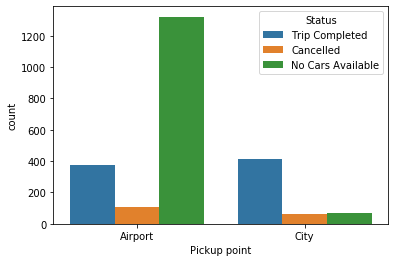

In [72]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)


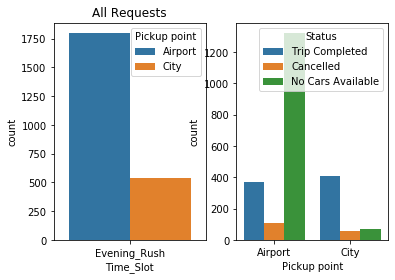

In [73]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="Time_Slot", hue="Pickup point", data=df_evening_rush, ax=ax[0]).set_title("All Requests")
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush, ax=ax[1])
plt.show()


* The figure on the left shows the all the requests made during evening rush hours from Airport and City. We can think that figure on the left as a visualization of total demands. The figure on the right shows how much of the demands are met.

<b> `Observations:` 
    * Number of requests is much higher from the Airport than from the City during the evening rush time-slot.
    * Unavailability of cars is very severe at the Airport during the evening rush time-slot. Most of the requests couldnot be met due to the unavailability of cars at the Airport during the evening rush.

In [74]:
df_city_cancelled.shape[0]

60

In [75]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [76]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [77]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [78]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [79]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [80]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [81]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [82]:
df_Cancelled_evening= df_evening_rush.loc[(df_evening_rush["Status"]=="Cancelled")]

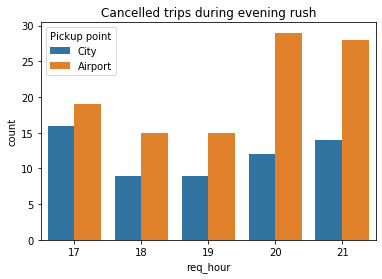

In [83]:
sns.countplot(x="req_hour",hue="Pickup point",data=df_Cancelled_evening)
plt.title("Cancelled trips during evening rush")
plt.show()

<b> `Observations:` </b>
* Numbers of cancellations are higher at the Airport than the numbers of cancellations at the City.
* Most cancellations at the Airport happens during 8:00 PM to 9:00 PM.

# Severity of problem by location in morning rush

In [84]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [85]:

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [86]:
df_Cancelled_morning= df_morning_rush.loc[(df_morning_rush["Status"]=="Cancelled")]

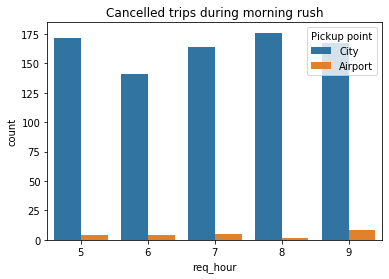

In [87]:
sns.countplot(x="req_hour",hue="Pickup point",data=df_Cancelled_morning)
plt.title("Cancelled trips during morning rush")
plt.show()

<b> `Observation:` </b>
* During the morning rush hours most cancellations happens at the City.
   

# Severity of problem by location in morning rush looking at unavailability of cars

In [88]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available") ].shape[0]

21

In [89]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available") ].shape[0]

385

In [90]:
df_unavailable_morning_Airport = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")]

In [91]:
df_unavailable_morning_City = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")]

In [92]:
df_unavailable_morning_Airport

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
4169,208,Airport,NaN,No Cars Available,2016-07-11 06:05:00,NaT,6,11,Morning_Rush
4218,473,Airport,NaN,No Cars Available,2016-07-11 09:22:00,NaT,9,11,Morning_Rush
4666,1570,Airport,NaN,No Cars Available,2016-07-12 06:28:00,NaT,6,12,Morning_Rush
4679,1624,Airport,NaN,No Cars Available,2016-07-12 07:04:00,NaT,7,12,Morning_Rush
4702,1761,Airport,NaN,No Cars Available,2016-07-12 08:48:00,NaT,8,12,Morning_Rush
4703,1765,Airport,NaN,No Cars Available,2016-07-12 08:48:00,NaT,8,12,Morning_Rush
4706,1779,Airport,NaN,No Cars Available,2016-07-12 08:55:00,NaT,8,12,Morning_Rush
4713,1813,Airport,NaN,No Cars Available,2016-07-12 09:19:00,NaT,9,12,Morning_Rush
4717,1856,Airport,NaN,No Cars Available,2016-07-12 09:45:00,NaT,9,12,Morning_Rush
4722,1862,Airport,NaN,No Cars Available,2016-07-12 09:56:00,NaT,9,12,Morning_Rush


In [93]:
df_unavailable_morning_City

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
4151,104,City,NaN,No Cars Available,2016-07-11 05:00:00,NaT,5,11,Morning_Rush
4152,103,City,NaN,No Cars Available,2016-07-11 05:02:00,NaT,5,11,Morning_Rush
4153,131,City,NaN,No Cars Available,2016-07-11 05:10:00,NaT,5,11,Morning_Rush
4154,124,City,NaN,No Cars Available,2016-07-11 05:12:00,NaT,5,11,Morning_Rush
4155,117,City,NaN,No Cars Available,2016-07-11 05:13:00,NaT,5,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [94]:
df_unavailable_morning= df_morning_rush.loc[(df_morning_rush["Status"]=="No Cars Available")]

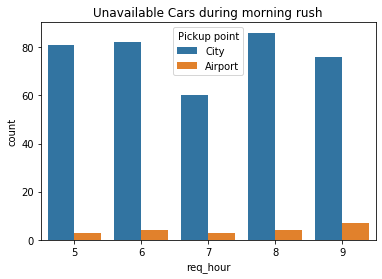

In [95]:

sns.countplot(x="req_hour",hue="Pickup point",data=df_unavailable_morning)
plt.title("Unavailable Cars during morning rush")
plt.show()

<b> `Observation:` </b>
* The problem of unavailability of cars occurs mostly at the City during the morning rush.

# Conclusions

<b>
    * Unavailability of Cars is most severe during evening rush hours. Irrespective of the pick-up points more cars need to be allotted during evening rush hours. <br>
    * More cars need to be allotted for Thursday and Friday.<br>
    * During morning rush time-slot more cars need to be allotted to the City.<br>
    * During evening rush time-slot more cars need to be allotted to the Airport.<br>
    * During late night time-slot more cars need to be allotted to the Airport.<br>
    